**Project: Investigate a Dataset (TMDb_Movies Dataset)**
----------------
--------------------------------------------------------

Overview
--------
Introduction
------------
Data Analysis project by using TMDb movies dataset.
The data set contains information about 10,000 movies collected from The Movie Database (TMDb). I investigated this data to answer question that can analyised from this data set, useing jupyter nootbook, Python, Numpy, Pandas, and matplotlib.

Question 
--------
1- What is the averege and maximum runtime of the movies

2- what is th movie with highest and lowest profit?

3- what is the most frequent genres?

4-What is the most frequent cast


-Load dataset
--------

In [15]:
#importing files that helps me to analysis the dataset
#load the csv file
 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df_movies = pd.read_csv('movies.csv')
df_movies.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08


Data Wrangling
------------

-Drop unused columns 
------------------

In [16]:

df_movies.drop(['imdb_id', 'homepage', 'keywords', 'vote_count', 'tagline', 'revenue', 'budget', 'production_companies'], axis=1, inplace=True)
df_movies.head(2)

,id,popularity,original_title,cast,director,overview,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,137999939.3,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,137999939.3,3.481613e+08


-Change data type to datetime 
------------------------------

In [17]:
# I ignored the missing values in some variables because their number is very small
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10866 non-null  int64         
 1   popularity      10866 non-null  float64       
 2   original_title  10866 non-null  object        
 3   cast            10790 non-null  object        
 4   director        10822 non-null  object        
 5   overview        10862 non-null  object        
 6   runtime         10866 non-null  int64         
 7   genres          10843 non-null  object        
 8   release_date    10866 non-null  datetime64[ns]
 9   vote_average    10866 non-null  float64       
 10  release_year    10866 non-null  int64         
 11  budget_adj      10866 non-null  float64       
 12  revenue_adj     10866 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 1.1+ MB


-Replacing 0 valuse with NAN
--------------

In [18]:
 df_tmdb_movies=['budget_adj', 'revenue_adj']
df_movies[df_tmdb_movies] = df_movies[df_tmdb_movies].replace(0, np.NAN)
df_movies.head(1)

,id,popularity,original_title,cast,director,overview,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015,137999939.3,1.392446e+09


In [19]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10866 non-null  int64         
 1   popularity      10866 non-null  float64       
 2   original_title  10866 non-null  object        
 3   cast            10790 non-null  object        
 4   director        10822 non-null  object        
 5   overview        10862 non-null  object        
 6   runtime         10866 non-null  int64         
 7   genres          10843 non-null  object        
 8   release_date    10866 non-null  datetime64[ns]
 9   vote_average    10866 non-null  float64       
 10  release_year    10866 non-null  int64         
 11  budget_adj      5170 non-null   float64       
 12  revenue_adj     4850 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 1.1+ MB


**Replace NAN values in revenue and budget with mean**
---------------

In [20]:
mean = df_movies['budget_adj'].mean()
df_movies['budget_adj'].fillna(mean, inplace=True)

In [21]:
mean = df_movies['revenue_adj'].mean()
df_movies['revenue_adj'].fillna(mean, inplace=True)

In [22]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10866 non-null  int64         
 1   popularity      10866 non-null  float64       
 2   original_title  10866 non-null  object        
 3   cast            10790 non-null  object        
 4   director        10822 non-null  object        
 5   overview        10862 non-null  object        
 6   runtime         10866 non-null  int64         
 7   genres          10843 non-null  object        
 8   release_date    10866 non-null  datetime64[ns]
 9   vote_average    10866 non-null  float64       
 10  release_year    10866 non-null  int64         
 11  budget_adj      10866 non-null  float64       
 12  revenue_adj     10866 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 1.1+ MB


In [23]:
df_movies['revenue_adj'] = df_movies['revenue_adj'].astype(int)

In [24]:
df_movies['budget_adj'] = df_movies['budget_adj'].astype(int)

-Insert new column with the profit for each movie
----------

In [25]:
df_movies.insert(13, 'profit', df_movies['revenue_adj']
                  - df_movies['budget_adj'])
df_movies.head(2)

,id,popularity,original_title,cast,director,overview,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015,137999939,1392445893,1254445954
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015,137999939,348161292,210161353


In [26]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10866 non-null  int64         
 1   popularity      10866 non-null  float64       
 2   original_title  10866 non-null  object        
 3   cast            10790 non-null  object        
 4   director        10822 non-null  object        
 5   overview        10862 non-null  object        
 6   runtime         10866 non-null  int64         
 7   genres          10843 non-null  object        
 8   release_date    10866 non-null  datetime64[ns]
 9   vote_average    10866 non-null  float64       
 10  release_year    10866 non-null  int64         
 11  budget_adj      10866 non-null  int64         
 12  revenue_adj     10866 non-null  int64         
 13  profit          10866 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)


In [27]:
#insert month column 
df_movies.insert(9, 'month', df_movies['release_date'].apply(lambda x: x.month))

In [28]:
df_movies.head(1)

,id,popularity,original_title,cast,director,overview,runtime,genres,release_date,month,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6,6.5,2015,137999939,1392445893,1254445954


**Investigate Data**
------------

1.The averege and maximum runtime of the movies
---------

In [29]:
#The average runtime 
df_movies['runtime'].mean()

102.07086324314375

In [30]:
df_movies[df_movies['runtime'] == df_movies['runtime'].max()]

,id,popularity,original_title,cast,director,overview,runtime,genres,release_date,month,vote_average,release_year,budget_adj,revenue_adj,profit
3894,125336,0.006925,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,"The Story of Film: An Odyssey, written and dir...",900,Documentary,2011-09-03,9,9.2,2011,36887736,115077354,78189618


In [31]:
#number of movies for each month 
df_movies.groupby('month').count()['id']

month
1      919
2      691
3      823
4      797
5      809
6      827
7      799
8      918
9     1331
10    1153
11     814
12     985
Name: id, dtype: int64

2.Movie with highest and lowest profit
-----------------

In [32]:
df_movies[df_movies['profit'] == df_movies['profit'].max()]

,id,popularity,original_title,cast,director,overview,runtime,genres,release_date,month,vote_average,release_year,budget_adj,revenue_adj,profit
1329,11,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,1977-03-20,3,7.9,1977,39575591,2789712242,2750136651


In [33]:
df_movies[df_movies['profit'] == df_movies['profit'].min()]

,id,popularity,original_title,cast,director,overview,runtime,genres,release_date,month,vote_average,release_year,budget_adj,revenue_adj,profit
2244,46528,0.25054,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,12,6.4,2010,425000000,11087569,-413912431


Text(0, 0.5, 'Pofit')

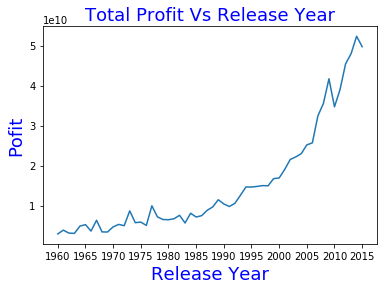

In [34]:
#Showing the change in profit over years 
year_profit = df_movies.groupby('release_year')['profit'].sum()
year_profit.plot(xticks = np.arange(1960,2016,5))
plt.title('Total Profit Vs Release Year', fontsize=18, c='b')
plt.xlabel("Release Year", fontsize=18, c='b')
plt.ylabel("Pofit", fontsize=18, c='b')

In [35]:
df_movies.groupby('release_year').count()['id']

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    490
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64

**The plot shows that 2014 year has the highest release of movies (700) 
followed by year 2013 (659) and year 2015 (629).**

3.**The most frequent genres**
--------------

In [36]:
#Using pandas Series to  count the different categories in genre column.
new = pd.Series(df_movies['genres'].str.cat(sep = '|').split('|'))

In [37]:
#how many movies in each genres
new.value_counts()

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

Text(0, 0.5, 'Number of movies')

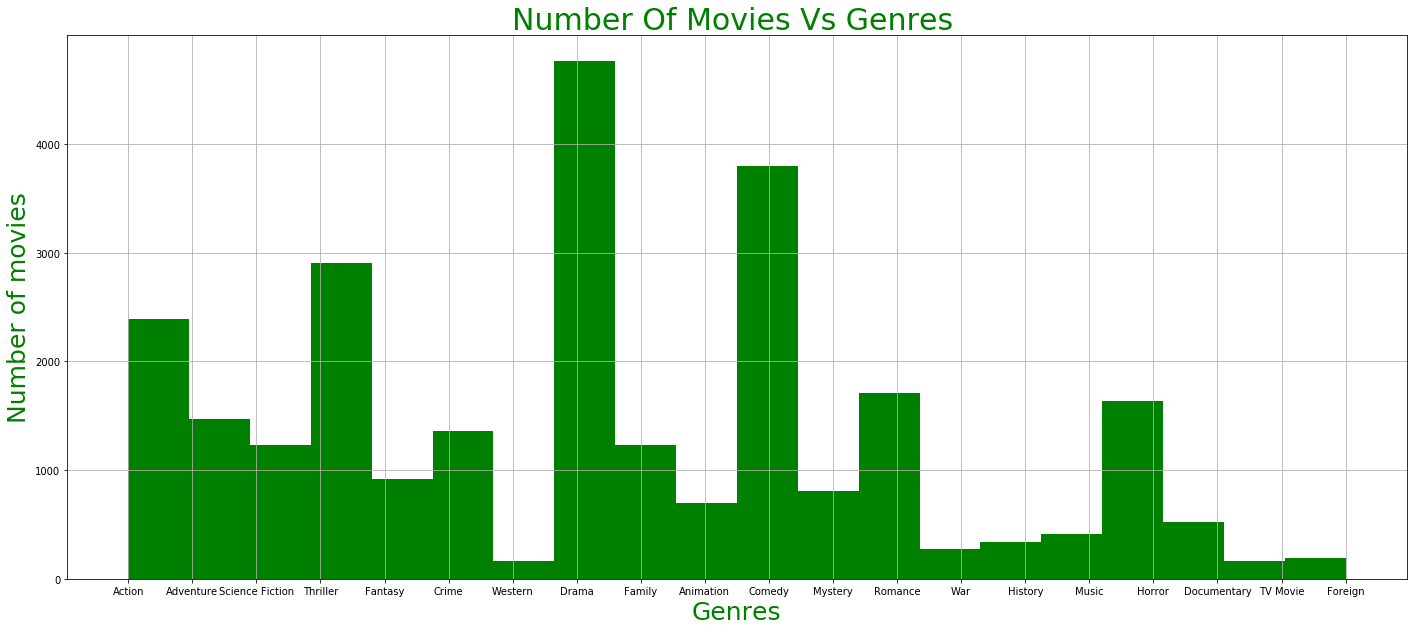

In [38]:
new.hist(figsize=(24,10), bins=20, rwidth= 1, color='g')
plt.title('Number Of Movies Vs Genres ', fontsize=30, c='g')
plt.xlabel("Genres", fontsize=25, c='g')
plt.ylabel("Number of movies", fontsize=25, c='g')

In [39]:
#the highest genres 
new.describe()

count     26960
unique       20
top       Drama
freq       4761
dtype: object

In [40]:
#the movie with highest vote average
df_movies[df_movies['vote_average'] == df_movies['vote_average'].max()]

,id,popularity,original_title,cast,director,overview,runtime,genres,release_date,month,vote_average,release_year,budget_adj,revenue_adj,profit
3894,125336,0.006925,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,"The Story of Film: An Odyssey, written and dir...",900,Documentary,2011-09-03,9,9.2,2011,36887736,115077354,78189618


In [41]:
#
df_movies['vote_average'].describe()

count    10866.000000
mean         5.974922
std          0.935142
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

4.**The most frequent cast**
-----------


In [42]:
cast = pd.Series(df_movies['cast'].str.cat(sep = '|').split('|'))

In [43]:
cast.value_counts()

Robert De Niro            72
Samuel L. Jackson         71
Bruce Willis              62
Nicolas Cage              61
Michael Caine             53
                          ..
William JÃ¸hnk Nielsen     1
Mary Birdsong              1
Andrei Dementiev           1
Clint Browning             1
Kim Stanley                1
Length: 19026, dtype: int64

In [44]:
cast.describe()

count              52573
unique             19026
top       Robert De Niro
freq                  72
dtype: object

5.**The most frequent director**
---------

In [45]:
df_movies['director'].describe()

count           10822
unique           5067
top       Woody Allen
freq               45
Name: director, dtype: object

In [46]:
df_movies['director'].value_counts()

Woody Allen          45
Clint Eastwood       34
Martin Scorsese      29
Steven Spielberg     29
Ridley Scott         23
                     ..
Mark Henn             1
Nacho Vigalondo       1
Anne Wheeler          1
Kristine Peterson     1
Martyn Pick           1
Name: director, Length: 5067, dtype: int64

Conclusion
----

after going through tmdb movies dataset I found these results:

1. Maximum number of movies release in year 2014,folwing by 2013 then 2015.
2.‘Star Wars'  is the most profitable movies.
3. Drama is the most popular genre, following by comedy and thriller.
4. Vote average is not highly related to the revenue. 
5. The average runtime is 102 minutes and the maximim runtime is 900 and it was a documentary movie. 
6. The most frequent cast is Robert De Niro with 72 movies.
7. The most frequent director is Woody Allen.
8. The trend on releasing movies is increasing over years as it showing in the Total Profit Vs Release Year chart.

